In [244]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from datetime import datetime, timedelta
import random

# Чтение набора данных об уровене денежных доходов населения в целом по россии и по субъектам российской федерации
## Ссылка на данные: https://rosstat.gov.ru/storage/mediabank/1-1-1_nov_met_izm.xlsx

In [245]:
df = pd.read_excel('data.xlsx')
df.head()

,Название субъекта,"Денежные доходы в расчете на душу населения, рублей в месяц 2013г.","Денежные доходы в расчете на душу населения, рублей в месяц 2014г.","Денежные доходы в расчете на душу населения, рублей в месяц 2015г.","Денежные доходы в расчете на душу населения, рублей в месяц 2016г.","Денежные доходы в расчете на душу населения, рублей в месяц 2017г.","Денежные доходы в расчете на душу населения, рублей в месяц 2018г.","Денежные доходы в расчете на душу населения, рублей в месяц 2019г.","Денежные доходы в расчете на душу населения, рублей в месяц 2020г.","Денежные доходы в расчете на душу населения, рублей в месяц 2021г."
0,Белгородская область,23246.766439,24750.163161,28043.238208,29798.581019,30342.115565,30778.0,32398.0,32884.0,35612.0
1,Брянская область,18707.421437,20594.446675,23428.121119,24005.628433,25106.605890,26658.0,28422.0,28636.0,31608.0
2,Владимирская область,18057.844532,19529.482244,22712.329960,22365.292780,23553.978729,23560.0,25391.0,25955.0,28523.0
3,Воронежская область,21682.906642,24973.337981,29365.774533,29283.948998,29497.731862,30289.0,32022.0,32102.0,35198.0
4,Ивановская область,17754.109842,19831.944017,22296.566313,23675.818198,24859.531479,24503.0,25794.0,26284.0,28680.0


In [246]:
df = df.rename(columns={'Название субъекта': 'subject_name', 'Денежные доходы в расчете на душу населения, рублей в месяц 2013г.': 'per_capita_income'})

In [247]:
income_df = df[['subject_name', 'per_capita_income']]
income_df.head()

,subject_name,per_capita_income
0,Белгородская область,23246.766439
1,Брянская область,18707.421437
2,Владимирская область,18057.844532
3,Воронежская область,21682.906642
4,Ивановская область,17754.109842


In [248]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   subject_name       89 non-null     object 
 1   per_capita_income  85 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


In [249]:
income_df = income_df.dropna()
income_df['per_capita_income'] = income_df['per_capita_income'].astype(int)

# Сгенерируем набор данных
### Предположим, что абсолютно здоровый человек замерял с помощью градусника свою температуру тела. Сгенерируем такой набор данных

In [250]:
num_records = 10000
start_date = datetime(2022, 1, 1)
end_date = datetime(2022, 12, 31)

date_range = [start_date + timedelta(days=random.randint(0, (end_date - start_date).days)) for _ in range(num_records)]

temperature_values = np.random.uniform(35.5, 37.0, num_records)

temperature_df = pd.DataFrame({
    'date': date_range,
    'temperature': temperature_values
})

temperature_df = temperature_df.sort_values(by='date').reset_index(drop=True)
temperature_df['temperature'] = temperature_df['temperature'].round(1)

In [251]:
temperature_df

,date,temperature
0,2022-01-01,36.2
1,2022-01-01,36.8
2,2022-01-01,36.1
3,2022-01-01,36.0
4,2022-01-01,36.7
...,...,...
9995,2022-12-31,36.4
9996,2022-12-31,35.9
9997,2022-12-31,37.0
9998,2022-12-31,35.6


# Рассчёт основных статистик

## Для набора данных по показателю денежных доходов в регионах в расчете на душу населения за 2013 год

In [252]:
median_val = income_df['per_capita_income'].median()
mean_val = income_df['per_capita_income'].mean()
diff  = round(100 * abs(median_val - mean_val)/(income_df['per_capita_income'].max() - income_df['per_capita_income'].min()), 2)


In [253]:
mode_val = income_df['per_capita_income'].mode()
print('Мода распределения:', mode_val)

Мода распределения: 0     11672
1     13272
2     13558
3     14028
4     14221
      ...  
80    42228
81    55624
82    55936
83    58828
84    66886
Name: per_capita_income, Length: 85, dtype: int32


In [254]:
print('Медиана распределения:', median_val)
print('Среднее распределения:', mean_val)
print('Разность среднего и медианы: ', abs(median_val - mean_val))
print(f'Медиана смещена относительно средней на {diff}% размаха')
print('Значение медианы является несмещённым отнсительного среднего')

Медиана распределения: 20078.0
Среднее распределения: 23401.623529411765
Разность среднего и медианы:  3323.623529411765
Медиана смещена относительно средней на 6.02% размаха
Значение медианы является несмещённым отнсительного среднего


### Создадим новый набор данных из исходного, добавив некорректные значения. Посмотрим изменится ли смещённость медианы относительно среднего

In [255]:
max_val = income_df['per_capita_income'].max()
count_anomaly = 20
diff_income_df = income_df.copy()
for i in range(count_anomaly):
    subject_name = 'Не указано' + str(i)
    row = {'subject_name': subject_name, 'per_capita_income': max_val}
    diff_income_df = diff_income_df._append(row, ignore_index = True)

In [256]:
median_val = diff_income_df['per_capita_income'].median()
mean_val = diff_income_df['per_capita_income'].mean()
diff  = round(100 * abs(median_val - mean_val)/(diff_income_df['per_capita_income'].max() - diff_income_df['per_capita_income'].min()), 2)

In [257]:
print('Медиана распределения:', median_val)
print('Среднее распределения:', mean_val)
print('Разность среднего и медианы: ', abs(median_val - mean_val))
print(f'Медиана смещена относительно средней на {diff}% размаха')
print('Значение медианы является смещённым отнсительного среднего')

Медиана распределения: 22066.0
Среднее распределения: 31684.361904761903
Разность среднего и медианы:  9618.361904761903
Медиана смещена относительно средней на 17.42% размаха
Значение медианы является смещённым отнсительного среднего


## Для набора данных по показателю температуры

In [258]:
median_val = temperature_df['temperature'].median()
mean_val = temperature_df['temperature'].mean()
diff  = round(100 * abs(median_val - mean_val)/(temperature_df['temperature'].max() - temperature_df['temperature'].min()), 2)

In [259]:
mode_val = temperature_df['temperature'].mode()
print('Мода распределения:', mode_val)

Мода распределения: 0    36.2
Name: temperature, dtype: float64


In [260]:
print('Медиана распределения:', median_val)
print('Среднее распределения:', mean_val)
print('Разность среднего и медианы: ', abs(median_val - mean_val))
print(f'Медиана смещена относительно средней на {diff}% размаха')
print('Значение медианы является несмещённым отнсительного среднего')

Медиана распределения: 36.3
Среднее распределения: 36.25721
Разность среднего и медианы:  0.04278999999999655
Медиана смещена относительно средней на 2.85% размаха
Значение медианы является несмещённым отнсительного среднего


# Построение графиков

## Для набора данных по показателю денежных доходов в регионах в расчете на душу населения за 2013 год

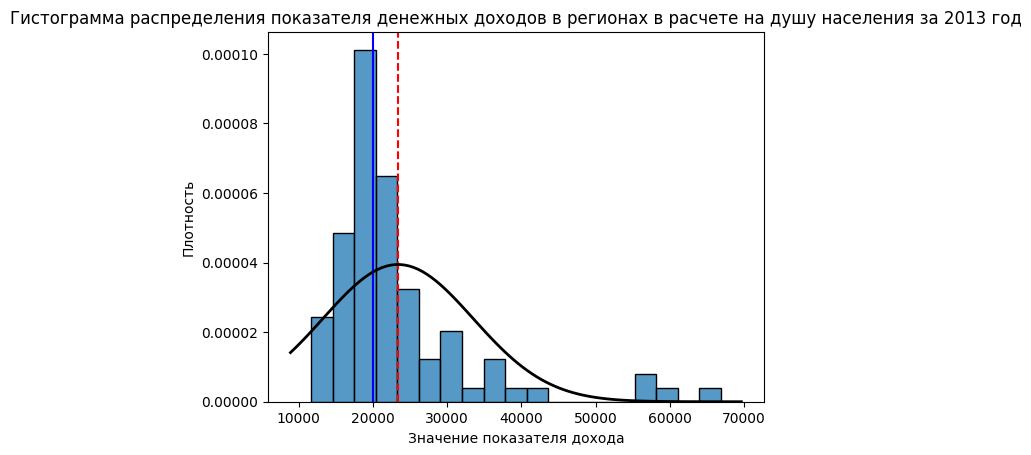

In [261]:
sns.histplot(income_df['per_capita_income'], kde=False, stat="density")

mean_val = income_df['per_capita_income'].mean()
median_val = income_df['per_capita_income'].median()
std_val = income_df['per_capita_income'].std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_val, std_val)

plt.axvline(mean_val, color='red', linestyle='--', label='Среднее')
plt.axvline(median_val, color='blue', linestyle='-', label='Медиана')

plt.plot(x, p, "k", linewidth=2, label="Нормальное распределение")
plt.title('Гистограмма распределения показателя денежных доходов в регионах в расчете на душу населения за 2013 год')
plt.xlabel('Значение показателя дохода')
plt.ylabel('Плотность')
plt.show()

Text(0, 0.5, 'Значение показателя дохода')

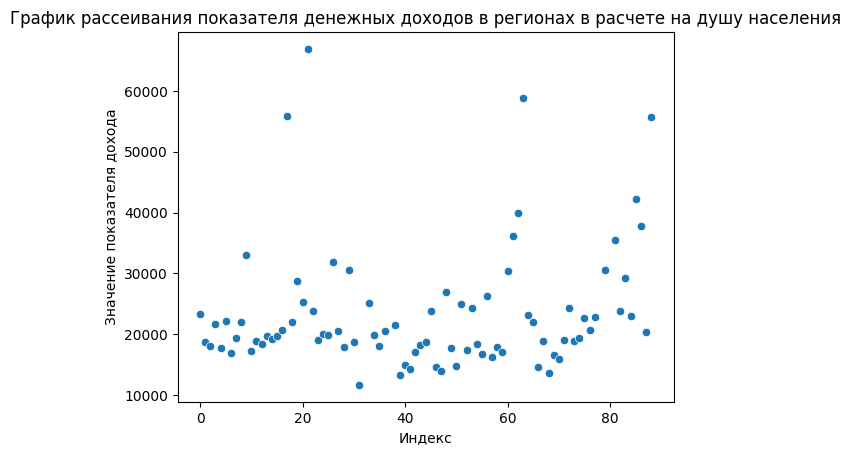

In [262]:
sns.scatterplot(income_df['per_capita_income'])
plt.title("График рассеивания показателя денежных доходов в регионах в расчете на душу населения")
plt.xlabel("Индекс")
plt.ylabel("Значение показателя дохода")

Text(0.5, 1.0, 'Круговая диаграмма показателя денежных доходов в регионах по категориям')

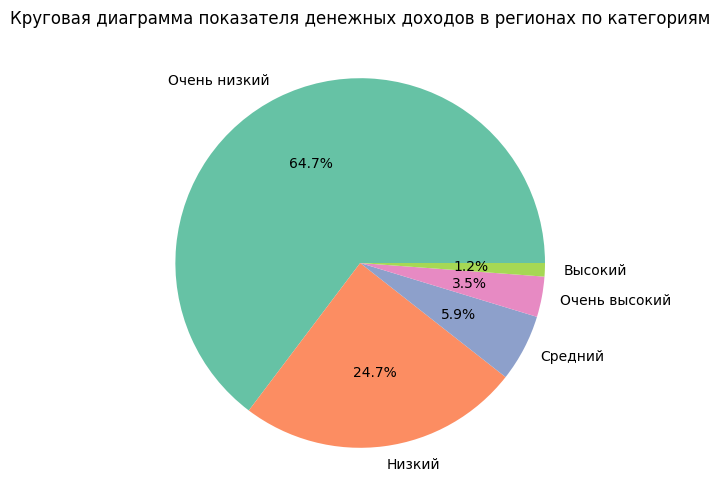

In [263]:
income_cats = pd.cut(
    income_df['per_capita_income'], bins=5, labels=["Очень низкий", "Низкий", "Средний", "Высокий", "Очень высокий"]
)
income_cats_counts = income_cats.value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    income_cats_counts,
    labels=income_cats_counts.index,
    autopct="%1.1f%%",
    colors=sns.color_palette("Set2"),
)
plt.title("Круговая диаграмма показателя денежных доходов в регионах по категориям")

## Для набора данных по показателю температуры

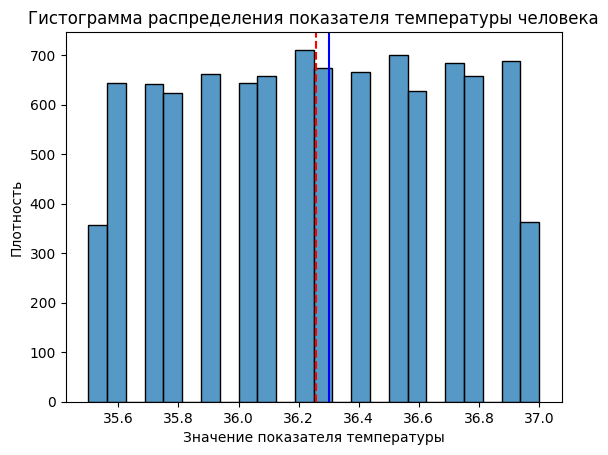

In [264]:
sns.histplot(temperature_df['temperature'])

mean_val = temperature_df['temperature'].mean()
median_val = temperature_df['temperature'].median()

plt.axvline(mean_val, color='red', linestyle='--', label='Среднее')
plt.axvline(median_val, color='blue', linestyle='-', label='Медиана')

plt.title('Гистограмма распределения показателя температуры человека')
plt.xlabel('Значение показателя температуры')
plt.ylabel('Плотность')
plt.show()

# Поиск аномальных значений

## Для набора данных по показателю денежных доходов в регионах в расчете на душу населения за 2013 год

<AxesSubplot: >

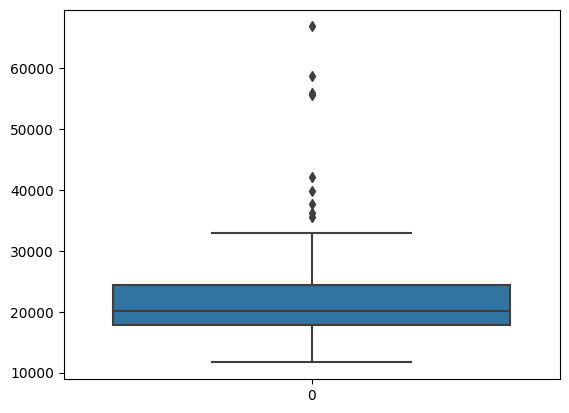

In [265]:
sns.boxplot(income_df['per_capita_income'])

In [266]:
q1 = income_df['per_capita_income'].quantile(0.25)
q3 = income_df['per_capita_income'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
income_df[income_df['per_capita_income'] > upper_bound].sort_values(by='per_capita_income')

,subject_name,per_capita_income
81,Камчатский край,35545
61,Тюменская область,36167
86,Сахалинская область,37791
62,Ханты-Мансийский АО-Югра,39882
85,Магаданская область,42228
88,Чукотский автономный округ,55624
17,г. Москва,55936
63,Ямало-Ненецкий АО,58828
21,Ненецкий АО,66886


##  Вывод
### Для точности стоит перепроверить информацию, но данные регионы могут иметь аномальные значения в силу развитости в них нефтегазовой промышленности. В таком случае на меньший размер населения (в сравнении с более восточными регионами) приходятся более высокие зарплаты.

## Для набора данных по показателю температуры

<AxesSubplot: >

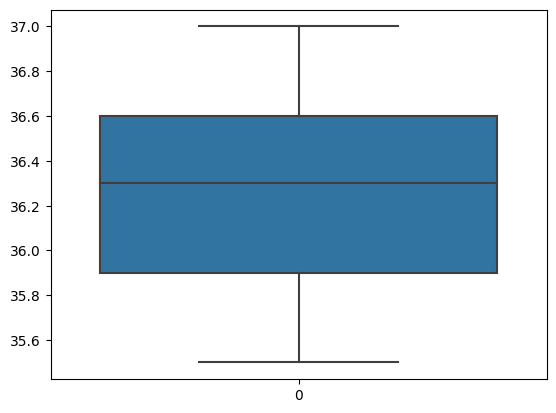

In [267]:
sns.boxplot(temperature_df['temperature'])

## На данном графике не наблюдаем аномальных значений